**STEP 1**: The installation, importation and upgrade of the needed libraries. This is important as there would be no code without these.

In [135]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
%cd ..
!pip install TA-lib
!pip install numpy pandas matplotlib yfinance mplfinance

import plotly.graph_objs as go
import plotly.figure_factory as ff
import mplfinance as mpf
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib as ta
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

--2024-11-24 23:58:00--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:c95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.13.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-11-24 23:58:00--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:c95, ...
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-11-24 23:58:00--  http://cfhcable.dl.sour

**STEP 2**: The creation of an interface that allows for the input of the ticker symbol of the equity, start date of data collection and end date of data collection. The interface should address easy of changeability.

In [171]:
ticker = "NVDA"
start_date = "2020-01-01"
end_date = "2024-11-22"

data = yf.download(ticker, start=start_date, end=end_date)
print(data)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low        Open      Volume
Ticker                           NVDA        NVDA        NVDA        NVDA        NVDA        NVDA
Date                                                                                             
2020-01-02 00:00:00+00:00    5.973122    5.997750    5.997750    5.918000    5.968750   237536000
2020-01-03 00:00:00+00:00    5.877518    5.901750    5.945750    5.852500    5.877500   205384000
2020-01-06 00:00:00+00:00    5.902164    5.926500    5.931750    5.781750    5.808000   262636000
2020-01-07 00:00:00+00:00    5.973620    5.998250    6.044250    5.909750    5.955000   314856000
2020-01-08 00:00:00+00:00    5.984824    6.009500    6.051000    5.953750    5.994000   277108000
2020-01-09 00:00:00+00:00    6.050553    6.075500    6.148250    6.021500    6.096250   255112000
2020-01-10 00:00:00+00:00    6.082920    6.108000    6.213750    6.093750    6.183250   316296000
2020-01-13 00:00:00+

**STEP 3**: Dropping of the columns that are not needed for this project. The needed columns for this project are DATE and CLOSE

In [172]:
data = data.drop(columns=['Adj Close', 'Volume'])
print(data)

Price                           Close        High         Low        Open
Ticker                           NVDA        NVDA        NVDA        NVDA
Date                                                                     
2020-01-02 00:00:00+00:00    5.997750    5.997750    5.918000    5.968750
2020-01-03 00:00:00+00:00    5.901750    5.945750    5.852500    5.877500
2020-01-06 00:00:00+00:00    5.926500    5.931750    5.781750    5.808000
2020-01-07 00:00:00+00:00    5.998250    6.044250    5.909750    5.955000
2020-01-08 00:00:00+00:00    6.009500    6.051000    5.953750    5.994000
2020-01-09 00:00:00+00:00    6.075500    6.148250    6.021500    6.096250
2020-01-10 00:00:00+00:00    6.108000    6.213750    6.093750    6.183250
2020-01-13 00:00:00+00:00    6.299500    6.324750    6.168750    6.191500
2020-01-14 00:00:00+00:00    6.182000    6.282000    6.168750    6.256500
2020-01-15 00:00:00+00:00    6.139250    6.217250    6.113250    6.194750
2020-01-16 00:00:00+00:00    6.223250 

**STEP 4**: Highlighting all possible patterns in the Technical Analysis library (TA-Lib) and converting the columns in data into 1D arrays.

In [173]:
pattern_functions = {
    'CDL2CROWS': ta.CDL2CROWS,
    'CDL3BLACKCROWS': ta.CDL3BLACKCROWS,
    'CDL3INSIDE': ta.CDL3INSIDE,
    'CDL3LINESTRIKE': ta.CDL3LINESTRIKE,
    'CDL3OUTSIDE': ta.CDL3OUTSIDE,
    'CDL3STARSINSOUTH': ta.CDL3STARSINSOUTH,
    'CDL3WHITESOLDIERS': ta.CDL3WHITESOLDIERS,
    'CDLABANDONEDBABY': ta.CDLABANDONEDBABY,
    'CDLADVANCEBLOCK': ta.CDLADVANCEBLOCK,
    'CDLBELTHOLD': ta.CDLBELTHOLD,
    'CDLBREAKAWAY': ta.CDLBREAKAWAY,
    'CDLCLOSINGMARUBOZU': ta.CDLCLOSINGMARUBOZU,
    'CDLCONCEALBABYSWALL': ta.CDLCONCEALBABYSWALL,
    'CDLCOUNTERATTACK': ta.CDLCOUNTERATTACK,
    'CDLDARKCLOUDCOVER': ta.CDLDARKCLOUDCOVER,
    'CDLDOJI': ta.CDLDOJI,
    'CDLDOJISTAR': ta.CDLDOJISTAR,
    'CDLDRAGONFLYDOJI': ta.CDLDRAGONFLYDOJI,
    'CDLENGULFING': ta.CDLENGULFING,
    'CDLEVENINGDOJISTAR': ta.CDLEVENINGDOJISTAR,
    'CDLEVENINGSTAR': ta.CDLEVENINGSTAR,
    'CDLGAPSIDESIDEWHITE': ta.CDLGAPSIDESIDEWHITE,
    'CDLGRAVESTONEDOJI': ta.CDLGRAVESTONEDOJI,
    'CDLHAMMER': ta.CDLHAMMER,
    'CDLHANGINGMAN': ta.CDLHANGINGMAN,
    'CDLHARAMI': ta.CDLHARAMI,
    'CDLHARAMICROSS': ta.CDLHARAMICROSS,
    'CDLHIGHWAVE': ta.CDLHIGHWAVE,
    'CDLHIKKAKE': ta.CDLHIKKAKE,
    'CDLHIKKAKEMOD': ta.CDLHIKKAKEMOD,
    'CDLHOMINGPIGEON': ta.CDLHOMINGPIGEON,
    'CDLIDENTICAL3CROWS': ta.CDLIDENTICAL3CROWS,
    'CDLINNECK': ta.CDLINNECK,
    'CDLINVERTEDHAMMER': ta.CDLINVERTEDHAMMER,
    'CDLKICKING': ta.CDLKICKING,
    'CDLKICKINGBYLENGTH': ta.CDLKICKINGBYLENGTH,
    'CDLLADDERBOTTOM': ta.CDLLADDERBOTTOM,
    'CDLLONGLEGGEDDOJI': ta.CDLLONGLEGGEDDOJI,
    'CDLLONGLINE': ta.CDLLONGLINE,
    'CDLMARUBOZU': ta.CDLMARUBOZU,
    'CDLMATCHINGLOW': ta.CDLMATCHINGLOW,
    'CDLMATHOLD': ta.CDLMATHOLD,
    'CDLMORNINGDOJISTAR': ta.CDLMORNINGDOJISTAR,
    'CDLMORNINGSTAR': ta.CDLMORNINGSTAR,
    'CDLONNECK': ta.CDLONNECK,
    'CDLPIERCING': ta.CDLPIERCING,
    'CDLRICKSHAWMAN': ta.CDLRICKSHAWMAN,
    'CDLRISEFALL3METHODS': ta.CDLRISEFALL3METHODS,
    'CDLSEPARATINGLINES': ta.CDLSEPARATINGLINES,
    'CDLSHOOTINGSTAR': ta.CDLSHOOTINGSTAR,
    'CDLSHORTLINE': ta.CDLSHORTLINE,
    'CDLSPINNINGTOP': ta.CDLSPINNINGTOP,
    'CDLSTALLEDPATTERN': ta.CDLSTALLEDPATTERN,
    'CDLSTICKSANDWICH': ta.CDLSTICKSANDWICH,
    'CDLTAKURI': ta.CDLTAKURI,
    'CDLTASUKIGAP': ta.CDLTASUKIGAP,
    'CDLTHRUSTING': ta.CDLTHRUSTING,
    'CDLTRISTAR': ta.CDLTRISTAR,
    'CDLUNIQUE3RIVER': ta.CDLUNIQUE3RIVER,
    'CDLUPSIDEGAP2CROWS': ta.CDLUPSIDEGAP2CROWS,
    'CDLXSIDEGAP3METHODS': ta.CDLXSIDEGAP3METHODS
}

data[['Open', 'High', 'Low', 'Close']] = data[['Open', 'High', 'Low', 'Close']].apply(pd.to_numeric, errors='coerce')

data['Open'] = pd.to_numeric(data['Open'].values.reshape(-1), errors='coerce')
data['High'] = pd.to_numeric(data['High'].values.reshape(-1), errors='coerce')
data['Low'] = pd.to_numeric(data['Low'].values.reshape(-1), errors='coerce')
data['Close'] = pd.to_numeric(data['Close'].values.reshape(-1), errors='coerce')

open_prices = data['Open'].values.reshape(-1)
high_prices = data['High'].values.reshape(-1)
low_prices = data['Low'].values.reshape(-1)
close_prices = data['Close'].values.reshape(-1)

for pattern, func in pattern_functions.items():
    data[pattern] = func(open_prices, high_prices, low_prices, close_prices)

**STEP 5**: Detecting patterns based on the the opening, closing, high and low prices and assigning the dates when those patterns were recognized to the patterns

In [174]:
detected_patterns = {}
for pattern in pattern_functions.keys():
    detected_dates = data[data[pattern] != 0]
    if not detected_dates.empty:
        detected_patterns[pattern] = detected_dates[['Open', 'High', 'Low', 'Close']]

# Example: Print detected patterns
for pattern, dates in detected_patterns.items():
    print(f"\nPattern: {pattern}")
    print(dates)


Pattern: CDL2CROWS
Price                         Open       High        Low     Close
Ticker                        NVDA       NVDA       NVDA      NVDA
Date                                                              
2020-10-14 00:00:00+00:00  14.2905  14.342750  13.960000  14.09525
2020-12-16 00:00:00+00:00  13.4225  13.437250  13.212500  13.24250
2021-08-31 00:00:00+00:00  22.6950  22.695000  22.120001  22.38500
2023-08-16 00:00:00+00:00  44.5200  44.674999  43.405998  43.48600

Pattern: CDL3BLACKCROWS
Price                           Open    High        Low  Close
Ticker                          NVDA    NVDA       NVDA   NVDA
Date                                                          
2022-01-20 00:00:00+00:00  25.304001  25.579  24.077999  24.15

Pattern: CDL3INSIDE
Price                            Open        High         Low       Close
Ticker                           NVDA        NVDA        NVDA        NVDA
Date                                                             

**STEP 6**: Plotting the chart and allowing for the saving of the chart as a PDF file for download and further usage

Chart saved as CDLXSIDEGAP3METHODS_chart.pdf


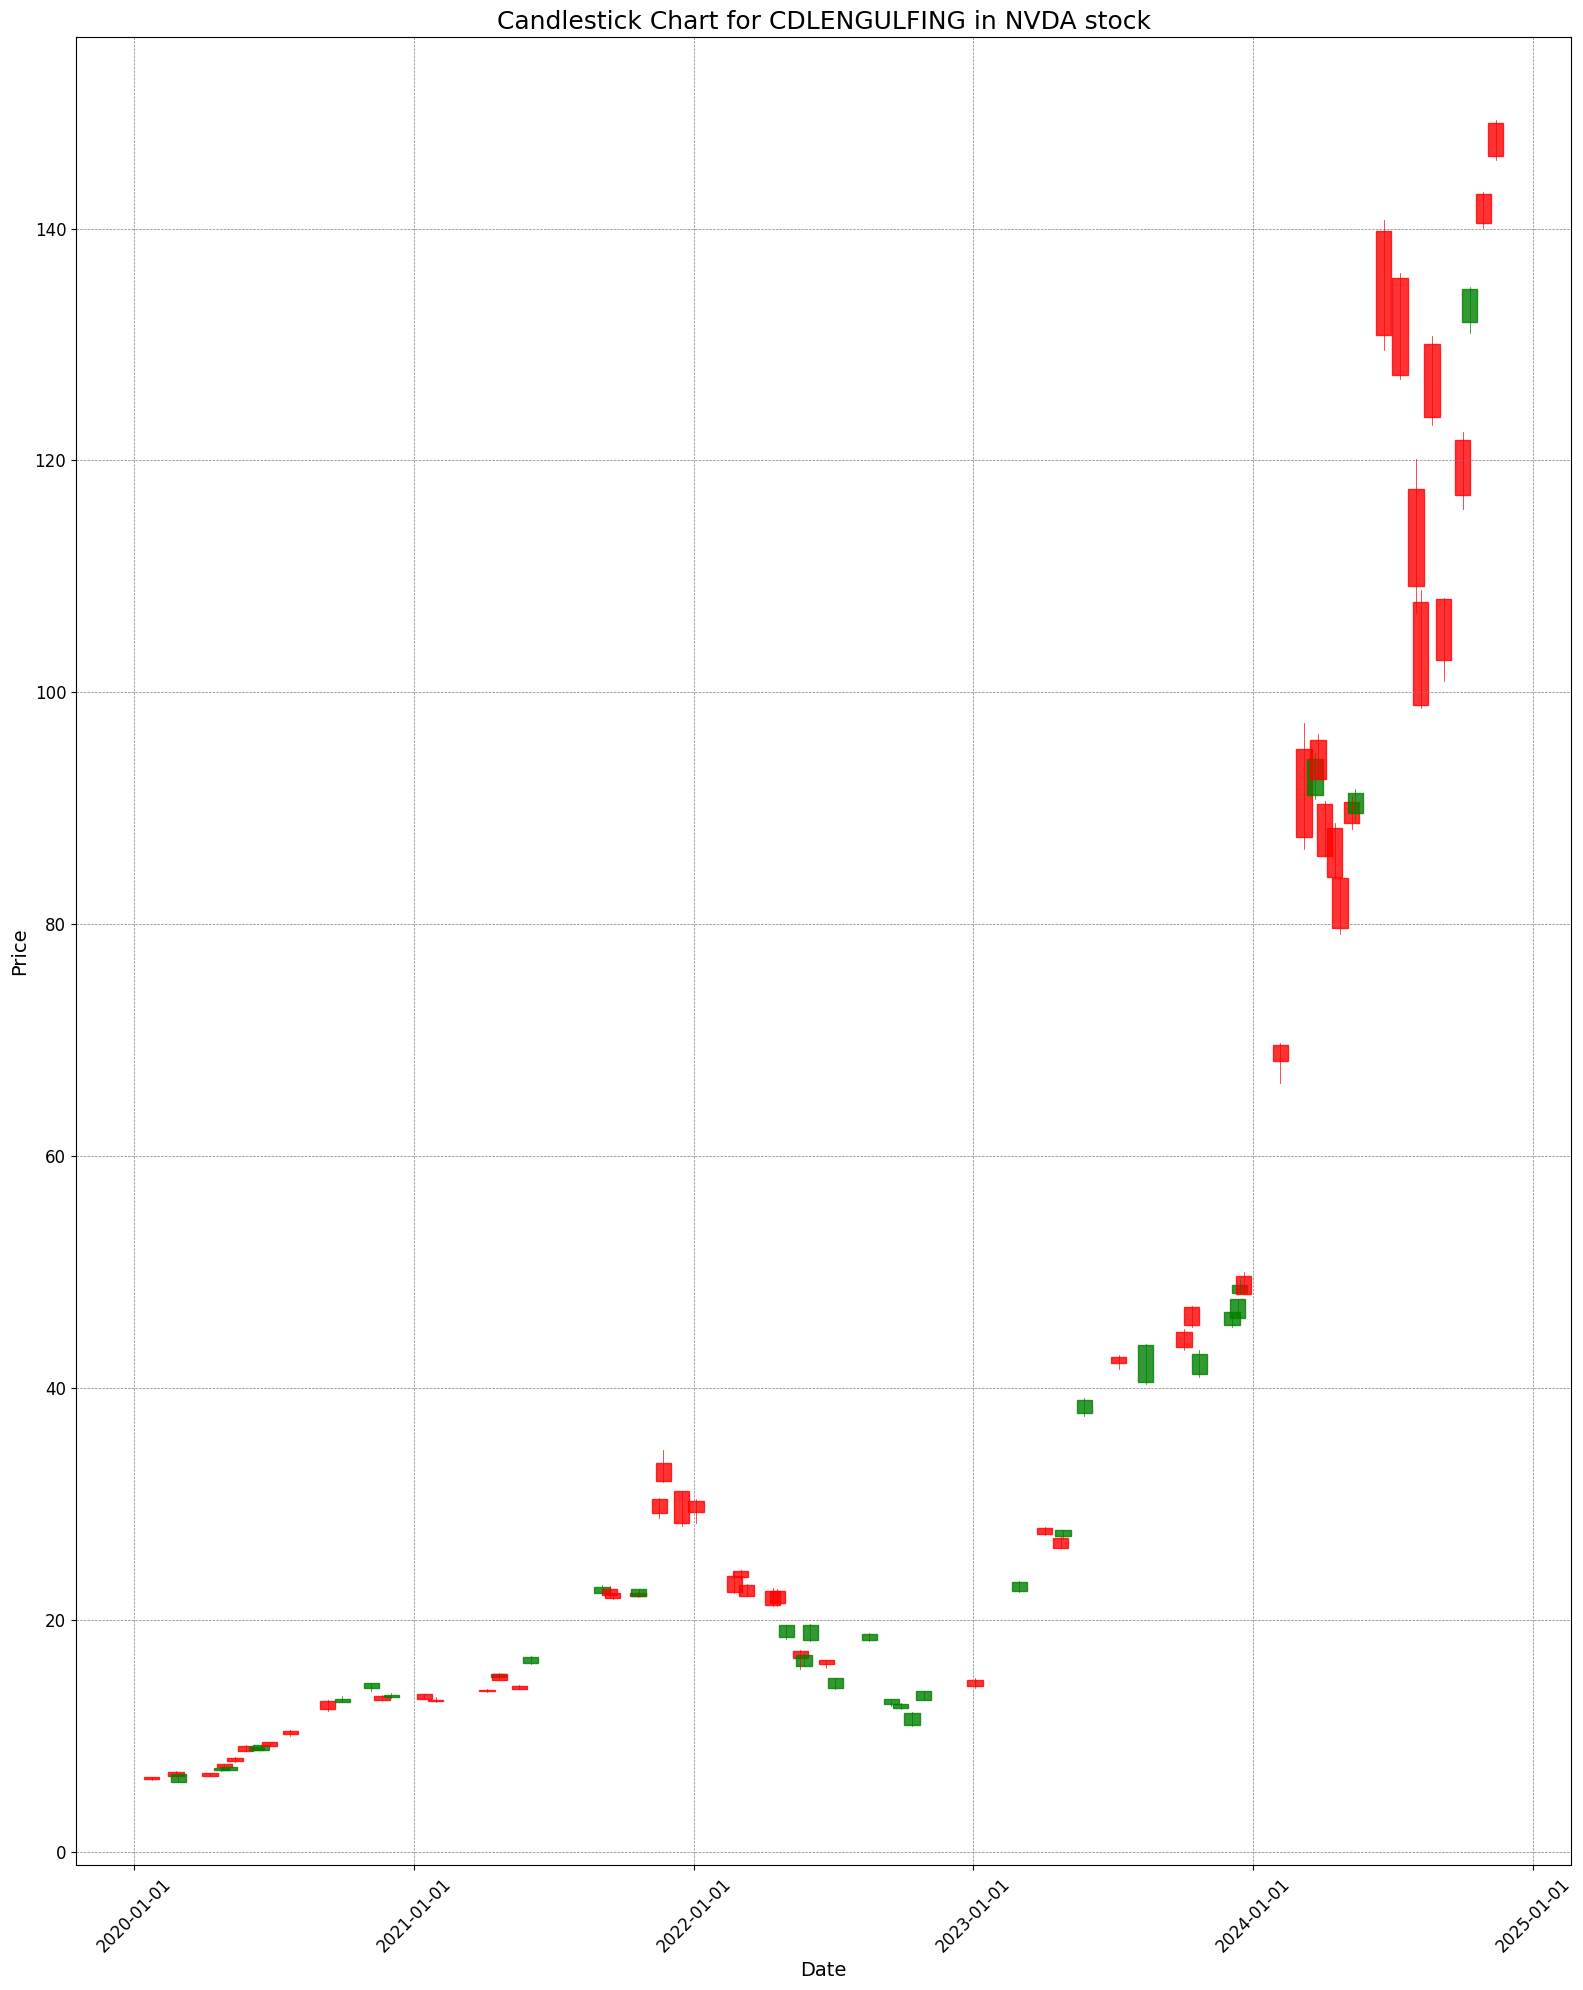

In [175]:
def plot_candlestick_for_pattern(data, pattern, pdf_filename):
    if pattern not in data.columns:
        print(f"Pattern {pattern} not found in data.")
        return

    filtered_data = data[data[pattern] != 0]

    if filtered_data.empty:
        print("No data found for the selected pattern.")
        return

    filtered_data = filtered_data.reset_index()
    filtered_data['Date'] = mdates.date2num(filtered_data['Date'])
    ohlc = filtered_data[['Date', 'Open', 'High', 'Low', 'Close']].values

    fig, ax = plt.subplots(figsize=(16, 20))
    candlestick_ohlc(ax, ohlc, width=20, colorup='green', colordown='red', alpha=0.8)

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.set_title(f"Candlestick Chart for {pattern} in {ticker} stock", fontsize=18)
    ax.set_xlabel("Date", fontsize=14)
    ax.set_ylabel("Price", fontsize=14)

    # Improve grid visibility
    ax.grid(color='gray', linestyle='--', linewidth=0.5)

    # Customize tick parameters for better readability
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)

    # Display the chart
    plt.tight_layout()
    plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
    print(f"Chart saved as {pdf_filename}")
    plt.show()

plot_candlestick_for_pattern(data, "CDLENGULFING", f"{pattern}_chart.pdf")
